In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [24]:
def NN_leave_one_out(dataset, current_features, feature, mode):
    correct_predictions = 0

    if mode == 1:
        updated_features = current_features.copy()
        updated_features.append(feature)
    else:
        updated_features = [f for f in current_features if f != feature]

    data_np = np.asarray(dataset)
    num_instances = data_np.shape[0]
    feature_set = data_np[:, updated_features]
    labels = data_np[:, 0]

    correct_predictions = sum(
        1 for index in range(num_instances)
        if labels[index] == np.delete(labels, index)[np.argmin(
            np.linalg.norm(np.delete(feature_set, index, axis=0) - feature_set[index], axis=1)
        )]
    )

    accuracy = correct_predictions / num_instances
    return accuracy


In [25]:
def forward_select(data, choice, stop_threshold=0.01):
    current_features = set()
    optimal_features = set()
    total_features = len(data[0])
    highest_accuracy = 0.0
    features_vs_accuracy = []

    round = 1
    print("Beginning search.")
    while round < total_features:
        current_best_feature = None
        current_best_accuracy = 0.0

        remaining_features = [feature for feature in range(1, total_features) if feature not in current_features]

        # Evaluate each feature in the remaining features
        for feature in remaining_features:
            temp_features = list(current_features)
            temp_features.append(feature)
            accuracy = NN_leave_one_out(data, temp_features, feature, choice)
            print(f"Using feature(s) {temp_features} accuracy is {accuracy:.1%}")

            if accuracy > current_best_accuracy:
                current_best_accuracy = accuracy
                current_best_feature = feature

        # Check if the best feature found in this round improves the accuracy
        if current_best_feature is not None:
            current_features.add(current_best_feature)
            print(f"\nFeature set {list(current_features)} was best, accuracy is {current_best_accuracy:.1%}")

            features_vs_accuracy.append((len(current_features), current_best_accuracy))

            if current_best_accuracy > highest_accuracy:
                optimal_features = current_features.copy()
                highest_accuracy = current_best_accuracy
            elif highest_accuracy - current_best_accuracy > stop_threshold:
                print(f"(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
                break

        round += 1

    print(f"Finished search!! The best feature subset is {list(optimal_features)}, which has an accuracy of {highest_accuracy:.1%}")

    # Plotting the bar graph
    plot_feature_vs_accuracy(features_vs_accuracy, "Forward Selection")


In [26]:
def backward_elim(data, choice, stop_threshold=0.01):
    current_features = set(range(1, len(data[0])))
    total_features = len(data[0])
    optimal_features = set(current_features)
    highest_accuracy = NN_leave_one_out(data, list(current_features), None, choice)
    features_vs_accuracy = [(len(current_features), highest_accuracy)]

    round = 1
    print("Beginning search.")
    while current_features:
        worst_feature = None
        highest_accuracy_round = 0.0

        for feature in list(current_features):
            temp_features = list(current_features - {feature})
            accuracy = NN_leave_one_out(data, temp_features, feature, choice)
            print(f"Using feature(s) {temp_features} accuracy is {accuracy:.1%}")

            if accuracy > highest_accuracy_round:
                highest_accuracy_round = accuracy
                worst_feature = feature

        if worst_feature is not None:
            current_features.remove(worst_feature)
            print(f"\nFeature set {list(current_features)} was best, accuracy is {highest_accuracy_round:.1%}")

            features_vs_accuracy.append((len(current_features), highest_accuracy_round))

            if highest_accuracy_round > highest_accuracy:
                optimal_features = set(current_features)
                highest_accuracy = highest_accuracy_round
            elif highest_accuracy - highest_accuracy_round > stop_threshold:
                print(f"(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
                break

        round += 1

    print(f"Finished search!! The best feature subset is {list(optimal_features)}, which has an accuracy of {highest_accuracy:.1%}")

    # Plotting the bar graph
    plot_feature_vs_accuracy(features_vs_accuracy, "Backward Elimination")


In [27]:
def plot_feature_vs_accuracy(features_vs_accuracy, title):
    features_vs_accuracy = sorted(features_vs_accuracy)
    x = [item[0] for item in features_vs_accuracy]
    y = [item[1] for item in features_vs_accuracy]

    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='blue', alpha=0.7)
    plt.xlabel("Number of Features in Subset")
    plt.ylabel("Accuracy")
    plt.title(f"Number of Features vs Accuracy for {title}")
    plt.show()

Welcome to the Feature Selection Algorithm
Please choose a dataset by entering:
1) Small Dataset (CS205_small_Data__9.txt)
2) Large Dataset (CS205_large_Data__42.txt)
1
Please choose an algorithm by entering:
1) Forward Selection
2) Backward Elimination
1

This dataset has 12 features (not including class attribute), with 500 instances.

Beginning search.
Using feature(s) [1] accuracy is 70.6%
Using feature(s) [2] accuracy is 70.0%
Using feature(s) [3] accuracy is 83.8%
Using feature(s) [4] accuracy is 71.8%
Using feature(s) [5] accuracy is 68.0%
Using feature(s) [6] accuracy is 67.4%
Using feature(s) [7] accuracy is 67.8%
Using feature(s) [8] accuracy is 68.6%
Using feature(s) [9] accuracy is 69.0%
Using feature(s) [10] accuracy is 69.0%
Using feature(s) [11] accuracy is 71.0%
Using feature(s) [12] accuracy is 67.0%

Feature set [3] was best, accuracy is 83.8%
Using feature(s) [3, 1] accuracy is 82.8%
Using feature(s) [3, 2] accuracy is 86.0%
Using feature(s) [3, 4] accuracy is 81.0%


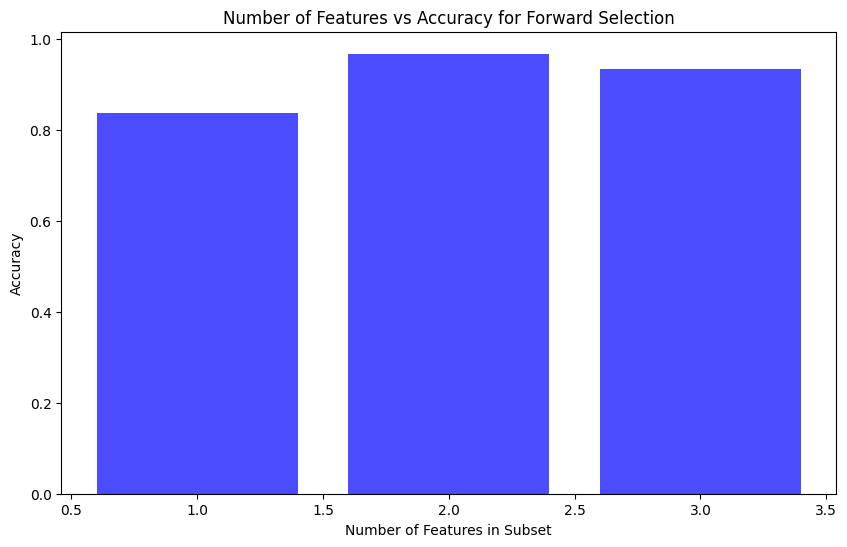

In [29]:
def main():
    stop_threshold = 0.01
    print("Welcome to the Feature Selection Algorithm")

    print("Please choose a dataset by entering:")
    print("1) Small Dataset (CS205_small_Data__9.txt)")
    print("2) Large Dataset (CS205_large_Data__42.txt)")

    dataset_choice = int(input())

    if dataset_choice == 1:
        data = np.loadtxt("CS205_small_Data__9.txt", dtype=float)
    elif dataset_choice == 2:
        data = np.loadtxt("CS205_large_Data__42.txt", dtype=float)
    else:
        print("Invalid choice. Please choose either 1 or 2!")
        return

    print("Please choose an algorithm by entering:")
    print("1) Forward Selection")
    print("2) Backward Elimination")

    algo_choice = int(input())

    if algo_choice == 1:
        print(f"\nThis dataset has {len(data[0]) - 1} features (not including class attribute), with {len(data)} instances.\n")
        forward_select(data, algo_choice, stop_threshold)
    elif algo_choice == 2:
        print(f"\nThis dataset has {len(data[0]) - 1} features (not including class attribute), with {len(data)} instances.\n")
        backward_elim(data, algo_choice, stop_threshold)
    else:
        print("Invalid choice. Please choose either 1 or 2!")

if __name__ == "__main__":
    main()
